<a href="https://colab.research.google.com/github/Hana0405/diamond_classifcation_v2/blob/main/diamond_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
from sklearn.model_selection import cross_val_score

from sklearn.tree import export_text
import graphviz
from sklearn.tree import export_graphviz

In [3]:
from google.colab import files
uploaded = files.upload()

Saving diamonds.csv to diamonds.csv


In [5]:
df = pd.read_csv('diamonds.csv')
df.describe()
#df.head()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
#df.head()

In [4]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [6]:
df.drop('Unnamed: 0', axis =1, inplace = True)

In [6]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
# Encode categorical data into numerical data
categorical_data = ['cut','color','clarity']
for cat in categorical_data:
  df[cat] = LabelEncoder().fit_transform(df[cat])


In [8]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
#Check unique values for all columns in a DataFrame
# for column in df.columns:
#     unique_values = df[column].unique()
#     print(f"Column '{column}' has {len(unique_values)} unique values:")
#     print(unique_values)
#     print("\n")

In [8]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)

In [ ]:
# # Check for 0 values in all columns
# zero_counts = df.eq(0).sum()

# # Print the results
# print("Number of 0 values in each column:")
# print(zero_counts)

In [9]:
def categorize_target(value):
    if value < 3000:
        return 0
    else:
        return 1

df['price'] = df['price'].apply(categorize_target)

In [11]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,0,4.34,4.35,2.75


In [10]:
from sklearn.preprocessing import MinMaxScaler
# Columns to scale
columns_to_scale = ['depth','cut','color','clarity', 'table','x','y','z']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the scaler on the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
# data now contains your scaled DataFrame with only selected columns scaled
#print("Scaled DataFrame:\n", df)

In [18]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0.50,0.166667,0.428571,0.513889,0.230769,0,0.031384,0.005433,0.044256
1,0.21,0.75,0.166667,0.285714,0.466667,0.346154,0,0.022825,0.002898,0.040351
2,0.23,0.25,0.166667,0.571429,0.386111,0.423077,0,0.045649,0.007063,0.040351
3,0.29,0.75,0.833333,0.714286,0.538889,0.288462,0,0.067047,0.009960,0.050765
4,0.31,0.25,1.000000,0.428571,0.563889,0.288462,0,0.087019,0.012133,0.054670


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  float64
 2   color    53920 non-null  float64
 3   clarity  53920 non-null  float64
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   price    53920 non-null  int64  
 7   x        53920 non-null  float64
 8   y        53920 non-null  float64
 9   z        53920 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 4.5 MB


In [17]:
# Split the data into features (X) and the target variable (y)
X = df[['carat','cut','color','clarity','depth', 'table','x','y','z']]
y = df['price']
# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 3,random_state=42)
# Fit the model on the training data
clf.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = clf.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.952429525222552
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96      6011
           1       0.93      0.97      0.95      4773

    accuracy                           0.95     10784
   macro avg       0.95      0.95      0.95     10784
weighted avg       0.95      0.95      0.95     10784



In [27]:
#Find the best max-depth for DT algorithm
# Define a range of max_depth values to iterate over
max_depth_values = range(3, 20)  # You can adjust this range

# Initialize variables to keep track of the best max depth and corresponding score
best_max_depth = None
best_score = 0.0

# Iterate over different max_depth values
for max_depth in max_depth_values:
    # Initialize the DecisionTreeClassifier with the current max_depth
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    # Fit the model to the training data
    clf.fit(X_train, y_train)
    # Evaluate the model on the test data
    test_score = clf.score(X_test, y_test)
    # Perform cross-validation on the training data
    #cv_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    # Print the score for the current max_depth
    print(f"Max Depth = {max_depth}: Test Score = {test_score}")
    # Check if the current model has a better score than the previous best
    if test_score > best_score:
        best_score = test_score
        best_max_depth = max_depth

# Print the best max depth and corresponding score
print(f"Best Max Depth = {best_max_depth}: Best Test Score = {best_score}")


Max Depth = 3: Test Score = 0.952429525222552
Max Depth = 4: Test Score = 0.964206231454006
Max Depth = 5: Test Score = 0.9677299703264095
Max Depth = 6: Test Score = 0.9723664688427299
Max Depth = 7: Test Score = 0.9740356083086054
Max Depth = 8: Test Score = 0.9754265578635015
Max Depth = 9: Test Score = 0.9754265578635015
Max Depth = 10: Test Score = 0.9755192878338279
Max Depth = 11: Test Score = 0.9719955489614244
Max Depth = 12: Test Score = 0.9721810089020771
Max Depth = 13: Test Score = 0.9710682492581603
Max Depth = 14: Test Score = 0.9718100890207715
Max Depth = 15: Test Score = 0.971253709198813
Max Depth = 16: Test Score = 0.9701409495548962
Max Depth = 17: Test Score = 0.9698627596439169
Max Depth = 18: Test Score = 0.9702336795252225
Max Depth = 19: Test Score = 0.9701409495548962
Best Max Depth = 10: Best Test Score = 0.9755192878338279


In [30]:
# Perform 10-fold cross-validation
scores = cross_val_score(clf, X, y, cv=10)
# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", scores.mean())

Cross-Validation Scores: [0.78468101 0.98998516 0.99740356 0.99962908 0.99944362 0.99925816
 0.99962908 0.99870178 0.99517804 0.9430638 ]
Mean CV Score: 0.9706973293768545


In [37]:
#Random forest algorithm
# Initialize the RandomForestClassifier
clf2 = RandomForestClassifier(n_estimators = 30,random_state=42)
# Fit the model to the training data
clf2.fit(X_train, y_train)
# Make predictions on the testing data
y_pred2 = clf2.predict(X_test)
# Evaluate the model
accuracy2 = accuracy_score(y_test, y_pred2)
report2 = classification_report(y_test, y_pred2)

print("Accuracy:", accuracy2)
print("Classification Report:\n", report2)

Accuracy: 0.9778375370919882
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      6011
           1       0.98      0.97      0.97      4773

    accuracy                           0.98     10784
   macro avg       0.98      0.98      0.98     10784
weighted avg       0.98      0.98      0.98     10784



In [38]:
# Perform 10-fold cross-validation
scores = cross_val_score(clf2, X, y, cv=10)
# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", scores.mean())

Cross-Validation Scores: [0.78412463 0.9870178  0.99740356 0.99944362 0.99981454 0.99981454
 0.99962908 0.99981454 0.99758902 0.95975519]
Mean CV Score: 0.9724406528189912


In [32]:
#Finding the best number of trees
# Define a range of n_estimators (number of trees) values to iterate over
n_estimators_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # You can adjust this range

# Initialize variables to keep track of the best n_estimators and corresponding score
best_n_estimators = None
best_score3 = 0.0

# Iterate over different n_estimators values
for n_estimators in n_estimators_values:
    # Initialize the RandomForestClassifier with the current n_estimators
    clf3 = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    # Fit the model to the training data
    clf3.fit(X_train, y_train)
    # Make predictions on the testing data
    y_pred3 = clf3.predict(X_test)
    # Calculate the accuracy score
    accuracy3 = accuracy_score(y_test, y_pred3)

    # Print the score for the current n_estimators
    print(f"n_estimators = {n_estimators}: Accuracy = {accuracy3}")

    # Check if the current model has a better accuracy score than the previous best
    if accuracy3 > best_score3:
        best_score3 = accuracy3
        best_n_estimators = n_estimators

# Print the best n_estimators and corresponding score
print(f"Best n_estimators = {best_n_estimators}: Best Accuracy = {best_score3}")

n_estimators = 10: Accuracy = 0.9757974777448071
n_estimators = 20: Accuracy = 0.9775593471810089
n_estimators = 30: Accuracy = 0.9778375370919882
n_estimators = 40: Accuracy = 0.978486646884273
n_estimators = 50: Accuracy = 0.9786721068249258
n_estimators = 60: Accuracy = 0.9781157270029673
n_estimators = 70: Accuracy = 0.9783939169139466
n_estimators = 80: Accuracy = 0.9783011869436202
n_estimators = 90: Accuracy = 0.9787648367952523
n_estimators = 100: Accuracy = 0.9787648367952523
Best n_estimators = 90: Best Accuracy = 0.9787648367952523


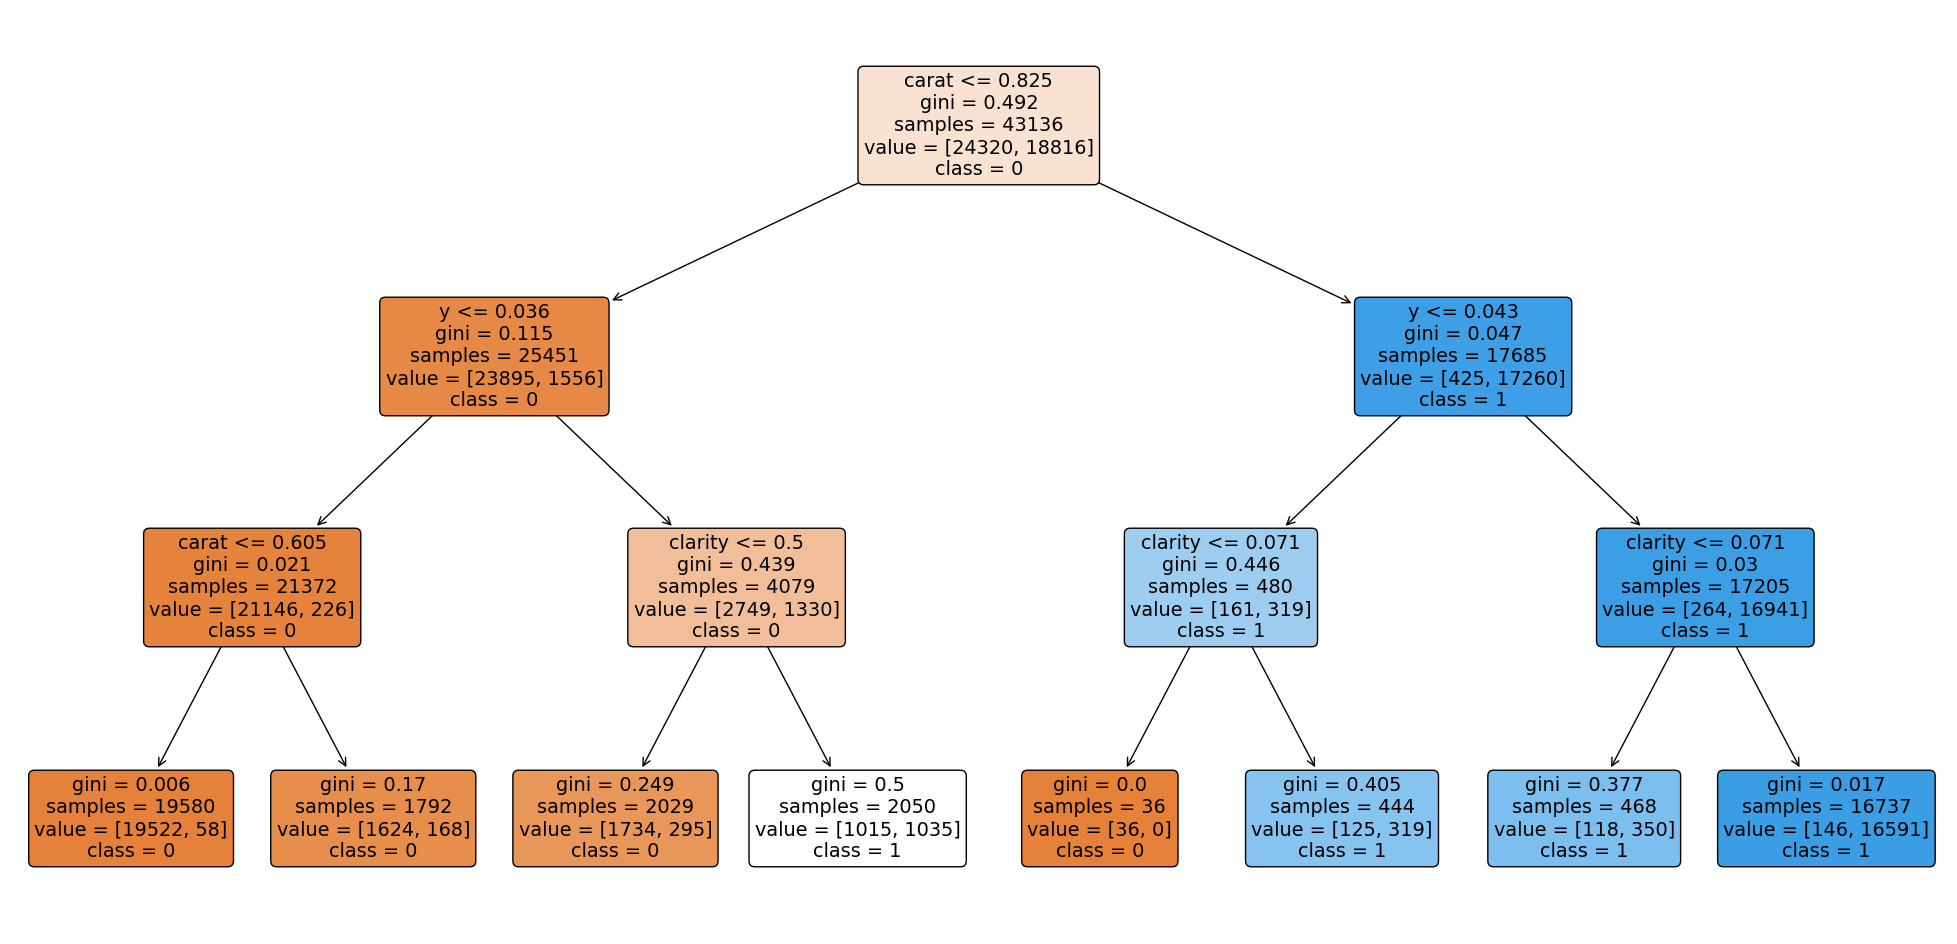

In [20]:
plt.figure(figsize=(25, 12))
tree.plot_tree(clf, feature_names=X.columns, class_names = ['0','1'], filled=True, rounded=True)
plt.show()

In [22]:
# Export the text representation of the decision tree
tree_rules = export_text(clf, feature_names=X.columns.tolist())
print(tree_rules)

|--- carat <= 0.82
|   |--- y <= 0.04
|   |   |--- carat <= 0.61
|   |   |   |--- class: 0
|   |   |--- carat >  0.61
|   |   |   |--- class: 0
|   |--- y >  0.04
|   |   |--- clarity <= 0.50
|   |   |   |--- class: 0
|   |   |--- clarity >  0.50
|   |   |   |--- class: 1
|--- carat >  0.82
|   |--- y <= 0.04
|   |   |--- clarity <= 0.07
|   |   |   |--- class: 0
|   |   |--- clarity >  0.07
|   |   |   |--- class: 1
|   |--- y >  0.04
|   |   |--- clarity <= 0.07
|   |   |   |--- class: 1
|   |   |--- clarity >  0.07
|   |   |   |--- class: 1



In [24]:
# Get feature importances
feature_importances = clf.feature_importances_
# Find the most important feature
most_important_feature = X.columns[feature_importances.argmax()]
print("The most important feature is:", most_important_feature)

The most important feature is: carat


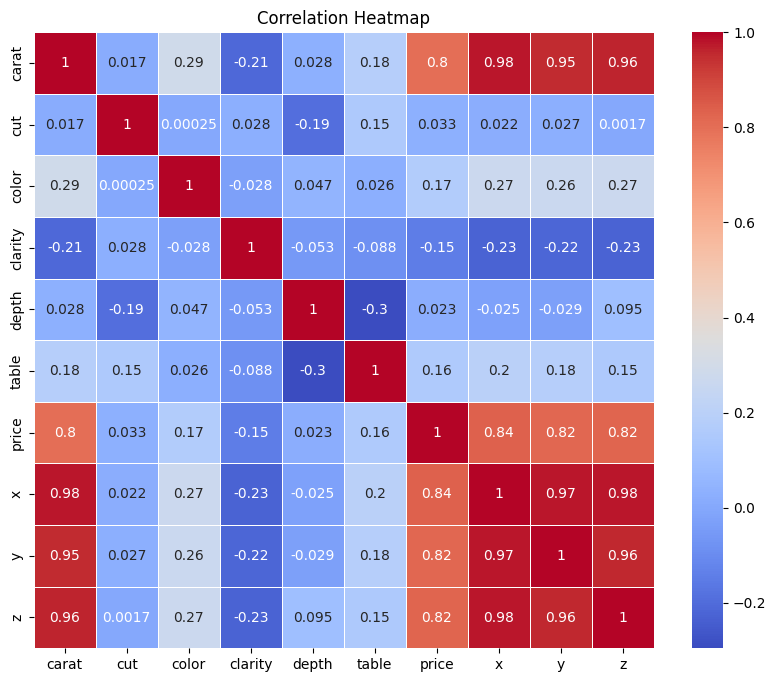

In [25]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
# Create a heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()